In [1]:
# full screen layout
from IPython.core.display import display, HTML
display(HTML(
    '<style>'
        '#notebook { padding-top:0px !important; } ' 
        '.container { width:100% !important; } '
        '.end_space { min-height:0px !important; } '
        'td {font-size: 25px}'
    '</style>'
))

In [2]:
# import libraries
import warnings
warnings.filterwarnings("ignore")
import constants as const
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
# useful functions for plotting
def create_plot(x,y,x_title,y_title,full_title, fig_name):
    
    fig,ax = plt.subplots(figsize = (18,14))
    ax.plot(x,y,color ='red',linewidth=3)
    
    ax.grid(True,linestyle='dashdot', color='grey')
    ax.tick_params(labelcolor='red', labelsize=15,pad=10,direction = 'inout', width=3)
    
    ax.set_ylim(0,20)
    
    ax.set_xlabel(x_title,fontsize=20)
    ax.set_ylabel(y_title,fontsize=20)
    ax.set_title(full_title,fontsize=25,pad =15)

    plt.savefig(fig_name)
    
def create_merged_plot(y1,y2,x,x_title,y_title,full_title,cases, ylim, fig_name):
    
    fig,ax = plt.subplots(figsize = (18,14))
    
    ax.plot(x,y1,linewidth=3, label=cases[0],color = '#d62728')
    ax.plot(x,y2,linewidth=3, label=cases[1],color = '#17becf')
    plt.fill_between(x, y1, y2, color="grey", alpha="0.3")
    
    ax.legend(fontsize=20)
    ax.grid(True,linestyle='dashdot', color='grey')
    ax.tick_params(labelcolor='red', labelsize=15,pad=10,direction = 'inout', width=3)
    
    #ax.set_xlim(0, 1000)
    if ylim is not None:
        ax.set_ylim(ylim,100)
        

    ax.set_xlabel(x_title,fontsize=20)
    ax.set_ylabel(y_title,fontsize=20)
    ax.set_title(full_title,fontsize=25,pad =15)
    
    plt.savefig(fig_name )
    

In [4]:
# useful functions for data evaluation
def import_metric(file, name):
    df = pd.read_csv(file,names=[name,"time"])
    return df

def align_axis(arr1,arr2,head1,head2):
    merged = pd.merge(arr1, arr2,on='time',how='outer').sort_values(by='time')
    merged[head2].fillna(method='ffill')
    merged[head1].fillna(method='ffill')
    
    return merged

def plot_metrics(arr1,arr2,head1,head2,title,ylim, fig_name):
    merged = pd.merge(arr1, arr2,on='time',how='outer').sort_values(by='time')

    x_axis = merged['time']
    y1 = merged[head1].fillna(method='ffill')
    y2 = merged[head2].fillna(method='ffill')

    create_merged_plot(y1=y1,
                       y2=y2,
                       x=x_axis,
                       x_title='unit time',
                       y_title='model error',
                       full_title=title,
                       cases=[head1,head2],
                       ylim=ylim,
                       fig_name=fig_name)

In [6]:
# # import metrics THRESHOLD
# MAE_central = import_metric("io_files/centralizedfeat_200MAE.csv","MAE_central")
# #################################################################################
# MAE_gm1=import_metric("io_files/gmfeat_10MAE.csv","MAE_gm1")
# MAE_gm2=import_metric("io_files/gmfeat_50MAE.csv","MAE_gm2")
# MAE_gm3=import_metric("io_files/gmfeat_100MAE.csv","MAE_gm3")
# MAE_gm4=import_metric("io_files/gmfeat_200MAE.csv","MAE_gm4")
# # MAE_gm5=import_metric("io_files/gmerr_0.1MAE.csv","MAE_gm5")
# # MAE_gm6=import_metric("io_files/gmerr_0.3MAE.csv","MAE_gm6")
# # MAE_gm7=import_metric("io_files/gmerr_0.5MAE.csv","MAE_gm7")
# # MAE_gm8=import_metric("io_files/gmerr_1.0MAE.csv","MAE_gm8")

# ROUNDS_gm1 =import_metric("io_files/gmfeat_10ROUNDS.csv","ROUNDS_gm1")
# ROUNDS_gm2 =import_metric("io_files/gmfeat_50ROUNDS.csv","ROUNDS_gm2")
# ROUNDS_gm3 =import_metric("io_files/gmfeat_100ROUNDS.csv","ROUNDS_gm3")
# ROUNDS_gm4 =import_metric("io_files/gmfeat_200ROUNDS.csv","ROUNDS_gm4")
# # ROUNDS_gm5 =import_metric("io_files/gmerr_0.1ROUNDS.csv","ROUNDS_gm5")
# # ROUNDS_gm6 =import_metric("io_files/gmerr_0.3ROUNDS.csv","ROUNDS_gm6")
# # ROUNDS_gm7 =import_metric("io_files/gmerr_0.5ROUNDS.csv","ROUNDS_gm7")
# # ROUNDS_gm8 =import_metric("io_files/gmerr_1.0ROUNDS.csv","ROUNDS_gm8")
#################################################################################
MAE_fgm1=import_metric("io_files/fgmfeat_200_node_50MAE.csv","MAE_fgm1")
# MAE_fgm2=import_metric("io_files/fgmfeat_500_node_10MAE.csv","MAE_fgm2")
# MAE_fgm3=import_metric("io_files/fgmfeat_1000_node_10MAE.csv","MAE_fgm3")
#MAE_fgm4=import_metric("io_files/fgmfeat_200_node_25MAE.csv","MAE_fgm4")
#MAE_fgm5=import_metric("io_files/fgmfeat_200_node_50MAE.csv","MAE_fgm5")
#MAE_fgm6=import_metric("io_files/fgmfeat_200_node_100MAE.csv","MAE_fgm6")

ROUNDS_fgm1 =import_metric("io_files//fgmfeat_200_node_50ROUNDS.csv","ROUNDS_fgm1")
#ROUNDS_fgm2 =import_metric("io_files//fgmfeat_500_node_10ROUNDS.csv","ROUNDS_fgm2")
#ROUNDS_fgm3 =import_metric("io_files//fgmfeat_1000_node_10ROUNDS.csv","ROUNDS_fgm3")
#ROUNDS_fgm4 =import_metric("io_files//fgmfeat_200_node_25ROUNDS.csv","ROUNDS_fgm4")
#ROUNDS_fgm5 =import_metric("io_files//fgmfeat_200_node_50ROUNDS.csv","ROUNDS_fgm5")
#ROUNDS_fgm6 =import_metric("io_files//fgmfeat_200_node_100ROUNDS.csv","ROUNDS_fgm6")



In [ ]:
# # import metrics WINDOW
# MAE_central = import_metric("io_files/centralizederr_0.01MAE.csv","MAE_central")
# #################################################################################
# MAE_gm1=import_metric("io_files/gmwindow_100MAE.csv","MAE_gm1")
# MAE_gm2=import_metric("io_files/gmwindow_500MAE.csv","MAE_gm2")
# MAE_gm3=import_metric("io_files/gmwindow_1000MAE.csv","MAE_gm3")
# MAE_gm4=import_metric("io_files/gmwindow_1500MAE.csv","MAE_gm4")
# MAE_gm5=import_metric("io_files/gmwindow_2000MAE.csv","MAE_gm5")
# MAE_gm6=import_metric("io_files/gmwindow_2500MAE.csv","MAE_gm6")

# ROUNDS_gm1 =import_metric("io_files/gmwindow_100ROUNDS.csv","ROUNDS_gm1")
# ROUNDS_gm2 =import_metric("io_files/gmwindow_500ROUNDS.csv","ROUNDS_gm2")
# ROUNDS_gm3 =import_metric("io_files/gmwindow_1000ROUNDS.csv","ROUNDS_gm3")
# ROUNDS_gm4 =import_metric("io_files/gmwindow_1500ROUNDS.csv","ROUNDS_gm4")
# ROUNDS_gm5 =import_metric("io_files/gmwindow_2000ROUNDS.csv","ROUNDS_gm5")
# ROUNDS_gm6 =import_metric("io_files/gmwindow_2500ROUNDS.csv","ROUNDS_gm6")
# #################################################################################
# MAE_fgm1=import_metric("io_files/fgmwindow_100MAE.csv","MAE_fgm1")
# MAE_fgm2=import_metric("io_files/fgmwindow_500MAE.csv","MAE_fgm2")
# MAE_fgm3=import_metric("io_files/fgmwindow_1000MAE.csv","MAE_fgm3")
# MAE_fgm4=import_metric("io_files/fgmwindow_1500MAE.csv","MAE_fgm4")
# MAE_fgm5=import_metric("io_files/fgmwindow_2000MAE.csv","MAE_fgm5")
# MAE_fgm6=import_metric("io_files/fgmwindow_2500MAE.csv","MAE_fgm6")

# ROUNDS_fgm1 =import_metric("io_files/fgmwindow_100ROUNDS.csv","ROUNDS_fgm1")
# ROUNDS_fgm2 =import_metric("io_files/fgmwindow_500ROUNDS.csv","ROUNDS_fgm2")
# ROUNDS_fgm3 =import_metric("io_files/fgmwindow_1000ROUNDS.csv","ROUNDS_fgm3")
# ROUNDS_fgm4 =import_metric("io_files/fgmwindow_1500ROUNDS.csv","ROUNDS_fgm4")
# ROUNDS_fgm5 =import_metric("io_files/fgmwindow_2000ROUNDS.csv","ROUNDS_fgm5")
# ROUNDS_fgm6 =import_metric("io_files/fgmwindow_2500ROUNDS.csv","ROUNDS_fgm6")


NameError: name 'MAE_gm4' is not defined

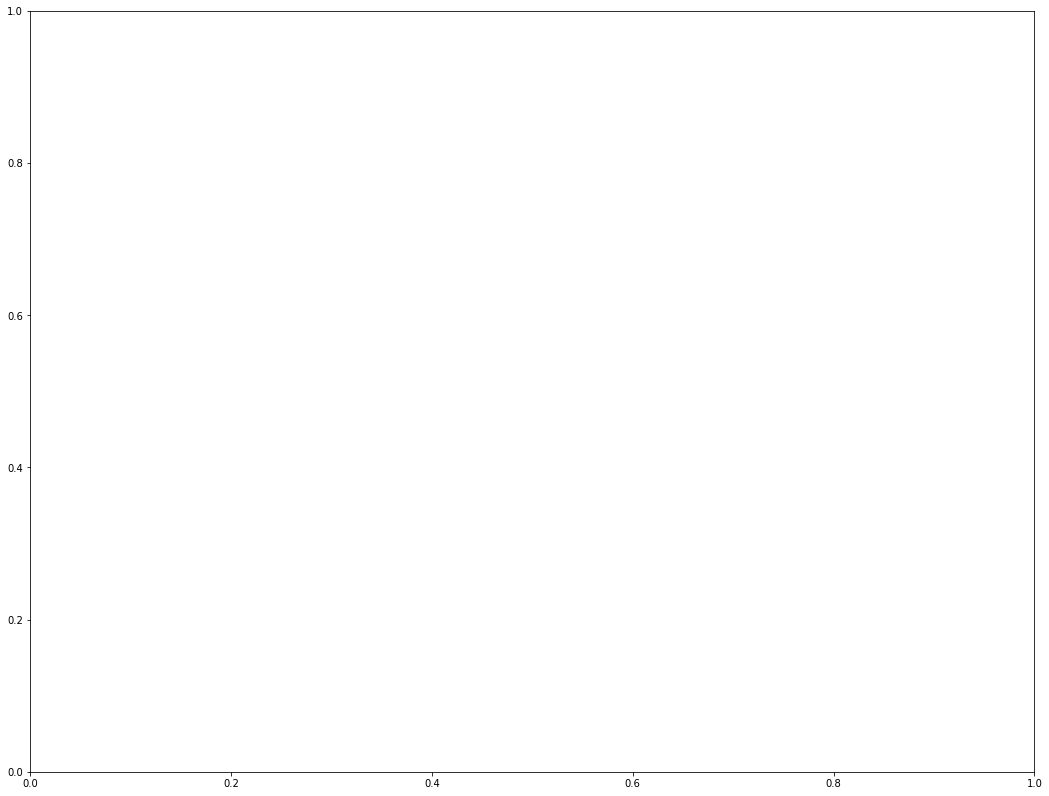

In [7]:
fig,ax = plt.subplots(figsize = (18,14))
#ax.plot(MAE_central["time"],MAE_central["MAE_central"], label="centralized")
#ax.plot(MAE_gm1["time"],MAE_gm1['MAE_gm1'].fillna(method='ffill'), label="features=10")
#ax.plot(MAE_gm2["time"],MAE_gm2['MAE_gm2'].fillna(method='ffill'), label="features=50")
#ax.plot(MAE_gm3["time"],MAE_gm3['MAE_gm3'].fillna(method='ffill'), label="features=100")
ax.plot(MAE_gm4["time"],MAE_gm4['MAE_gm4'].fillna(method='ffill'), label="features=200")
# ax.plot(MAE_gm5["time"],MAE_gm5['MAE_gm5'].fillna(method='ffill'), label="window=2000")
# ax.plot(MAE_gm6["time"],MAE_gm6['MAE_gm6'].fillna(method='ffill'), label="window=2500")

ax.legend(fontsize=20)
ax.grid(True,linestyle='dashdot', color='grey')
ax.tick_params(labelcolor='red', labelsize=15,pad=10,direction = 'inout', width=3)

ax.set_xlabel("time",fontsize=20)
ax.set_ylabel("MAE",fontsize=20)
ax.set_title("Error of GM",fontsize=25,pad =15)

ax.set_xlim(0,2000)


(0, 2000)

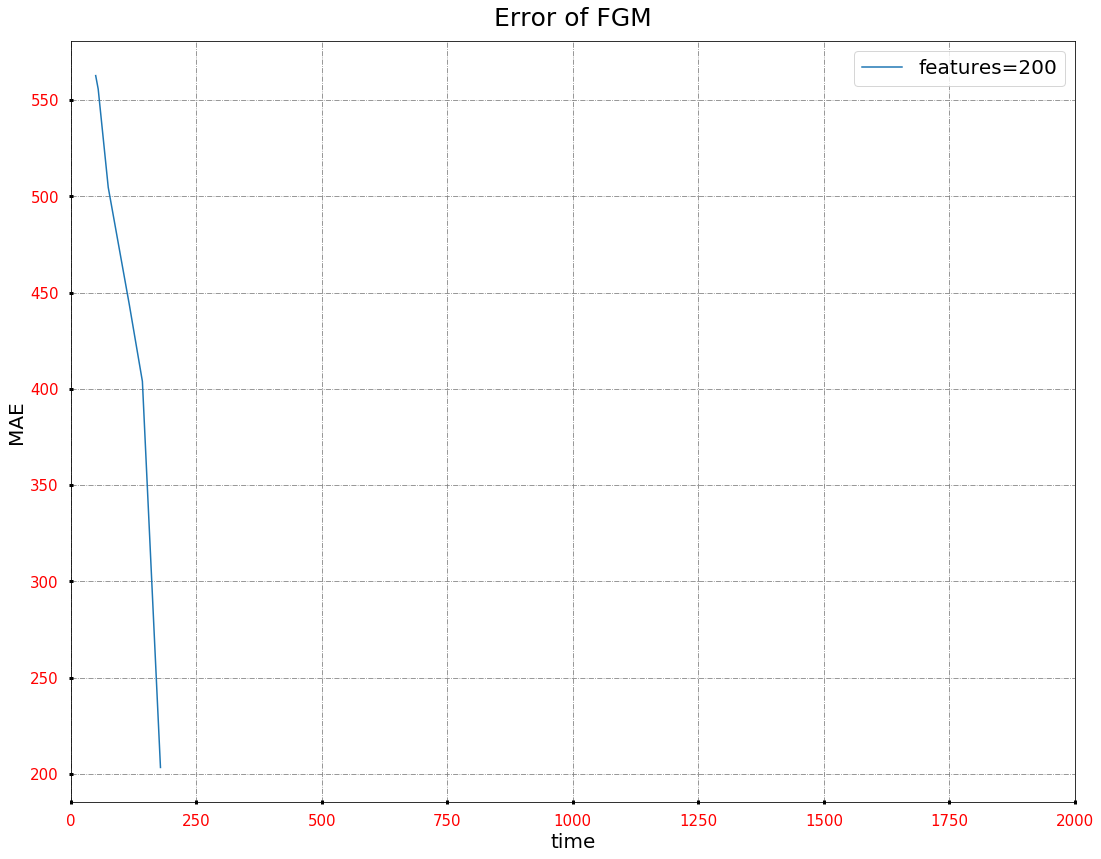

In [9]:
fig,ax = plt.subplots(figsize = (18,14))
#ax.plot(MAE_central["time"],MAE_central["MAE_central"], label="centralized")
ax.plot(MAE_fgm1["time"],MAE_fgm1['MAE_fgm1'].fillna(method='ffill'), label="features=200")
#ax.plot(MAE_fgm2["time"],MAE_fgm2['MAE_fgm2'].fillna(method='ffill'), label="features=500")
#ax.plot(MAE_fgm3["time"],MAE_fgm3['MAE_fgm3'].fillna(method='ffill'), label="features=1000")
#ax.plot(MAE_fgm4["time"],MAE_fgm4['MAE_fgm4'].fillna(method='ffill'), label="nodes=25")
#ax.plot(MAE_fgm5["time"],MAE_fgm5['MAE_fgm5'].fillna(method='ffill'), label="nodes=50")
#ax.plot(MAE_fgm6["time"],MAE_fgm6['MAE_fgm6'].fillna(method='ffill'), label="nodes=100")

ax.legend(fontsize=20)
ax.grid(True,linestyle='dashdot', color='grey')
ax.tick_params(labelcolor='red', labelsize=15,pad=10,direction = 'inout', width=3)

ax.set_xlabel("time",fontsize=20)
ax.set_ylabel("MAE",fontsize=20)
ax.set_title("Error of FGM",fontsize=25,pad =15)

ax.set_xlim(0,2000)

In [ ]:

fig,ax = plt.subplots(figsize = (18,14))
ax.plot(ROUNDS_gm1['time'],ROUNDS_gm1['ROUNDS_gm1'], label="features=10")
ax.plot(ROUNDS_gm2['time'],ROUNDS_gm2['ROUNDS_gm2'], label="features=50")
ax.plot(ROUNDS_gm3['time'],ROUNDS_gm3['ROUNDS_gm3'], label="features=100")
ax.plot(ROUNDS_gm4['time'],ROUNDS_gm4['ROUNDS_gm4'], label="features=200")
#ax.plot(ROUNDS_gm5['time'],ROUNDS_gm5['ROUNDS_gm5'], label="window=2000")
#ax.plot(ROUNDS_gm6['time'],ROUNDS_gm6['ROUNDS_gm6'], label="window=2500")

ax.legend(fontsize=20)
ax.grid(True,linestyle='dashdot', color='grey')
ax.tick_params(labelcolor='red', labelsize=15,pad=10,direction = 'inout', width=3)

ax.set_xlabel("time",fontsize=20)
ax.set_ylabel("ROUNDS",fontsize=20)
ax.set_title("ROUNDS of GM",fontsize=25,pad =15)

# ax.set_xlim(0,10000)


NameError: name 'ROUNDS_fgm2' is not defined

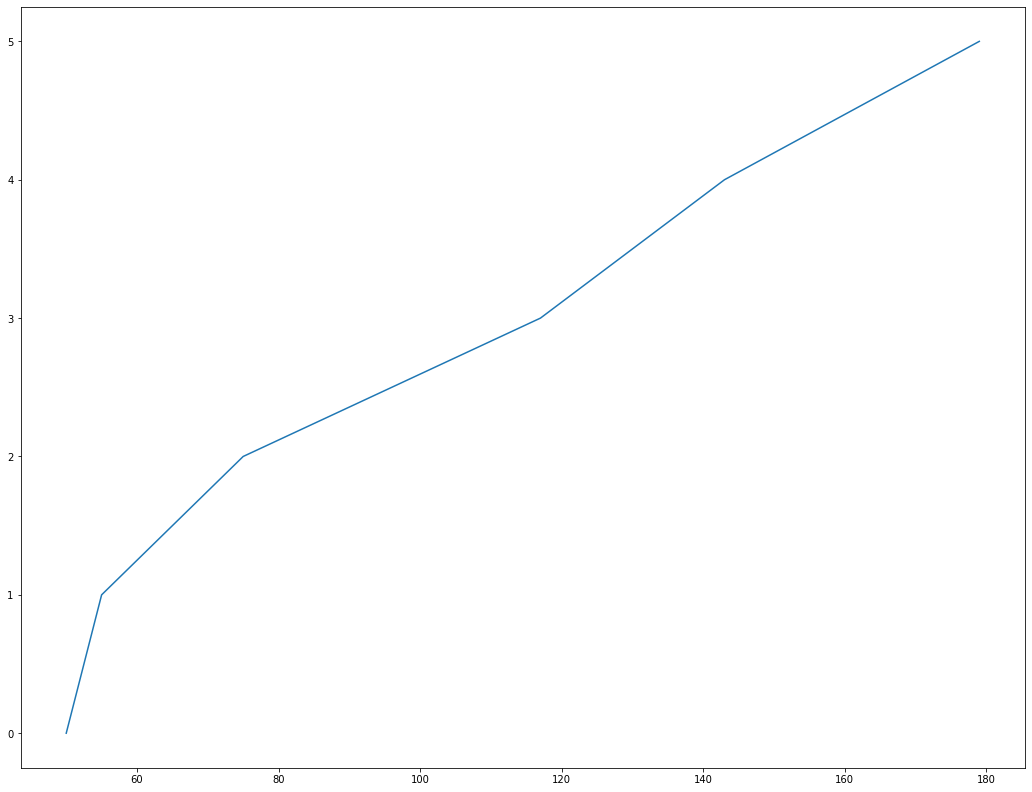

In [10]:
fig,ax = plt.subplots(figsize = (18,14))
ax.plot(ROUNDS_fgm1['time'],ROUNDS_fgm1['ROUNDS_fgm1'], label="features=200")
ax.plot(ROUNDS_fgm2['time'],ROUNDS_fgm2['ROUNDS_fgm2'], label="features=500")
ax.plot(ROUNDS_fgm3['time'],ROUNDS_fgm3['ROUNDS_fgm3'], label="features=1000")
#ax.plot(ROUNDS_fgm4['time'],ROUNDS_fgm4['ROUNDS_fgm4'], label="nodes=25")
#ax.plot(ROUNDS_fgm5['time'],ROUNDS_fgm5['ROUNDS_fgm5'], label="nodes=50")
#ax.plot(ROUNDS_fgm6['time'],ROUNDS_fgm6['ROUNDS_fgm6'], label="nodes=100")

ax.legend(fontsize=20)
ax.grid(True,linestyle='dashdot', color='grey')
ax.tick_params(labelcolor='red', labelsize=15,pad=10,direction = 'inout', width=3)

ax.set_xlabel("time",fontsize=20)
ax.set_ylabel("ROUNDS",fontsize=20)
ax.set_title("ROUNDS of FGM",fontsize=25,pad =15)

#ax.set_yscale('log')

# ax.set_xlim(0,5000)
# ax.set_ylim(0,1000)
